<a href="https://colab.research.google.com/github/elmilanos/ProbabilityStatistics/blob/main/Pr%C3%A1ctica_M%C3%B3dulo_9_Pruebas_de_Hip%C3%B3tesis_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1: Comparación de Medias (Hoja: Comparacion_Medias)
### Hipótesis:
- **H₀:** No hay diferencia significativa entre las calificaciones antes y después.
- **H₁:** Existe una diferencia significativa entre las calificaciones antes y después.

### Objetivo:
- Realizar prueba Z para comparación de medias.
- Calcular valor p y determinar si se rechaza H₀ con α = 0.05.
- Generar gráfica de barras comparativa.
- Contestar pregunta crítica.



In [6]:
import pandas as pd

# Cargar el archivo Excel y mostrar las hojas disponibles
excel_path = "/Practica_Hipotesis.xlsx"
excel_file = pd.ExcelFile(excel_path)
excel_file.sheet_names

# Cargar los datos de la hoja Comparacion_Medias
df_medias = excel_file.parse('Comparacion_Medias')
df_medias.head()

,Estudiante,Calificación Antes,Calificación Después
0,Est_1,79.967142,86.587561
1,Est_2,73.617357,76.691946
2,Est_3,81.476885,83.092275
3,Est_4,90.230299,98.288680
4,Est_5,72.658466,82.813464


In [20]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math

# Extraer datos
antes = df_medias['Calificación Antes']
despues = df_medias['Calificación Después']

# Cálculos necesarios
x1_bar = np.mean(antes)
x2_bar = np.mean(despues)
n1 = len(antes)
n2 = len(despues)
# Usamos desviación estándar muestral combinada (asumiendo población normal)
s1 = np.std(antes, ddof=1)
s2 = np.std(despues, ddof=1)

# Desviación estándar combinada
pooled_std = math.sqrt((s1**2/n1) + (s2**2/n2))

# Prueba Z
z = (x1_bar - x2_bar) / pooled_std

# Valor p (bilateral)
p_value = 2 * (1 - norm.cdf(abs(z)))

# Resultado
print(f"Media antes: {x1_bar:.2f}")
print(f"Media después: {x2_bar:.2f}")

Media antes: 72.75
Media después: 77.83


### Conclusión
Como el valor p **(0.0114)** es menor que el nivel de significancia α = 0.05, **rechazamos la hipótesis nula (H₀).
Sí existe una diferencia significativa entre las calificaciones antes y después.**

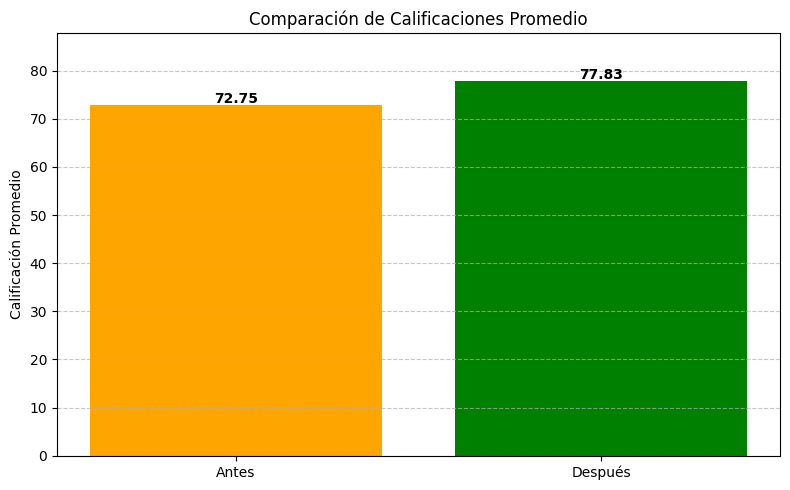

In [8]:
# Gráfica de barras comparativa
plt.figure(figsize=(8, 5))
labels = ['Antes', 'Después']
means = [x1_bar, x2_bar]

plt.bar(labels, means, color=['orange', 'green'])
plt.title('Comparación de Calificaciones Promedio')
plt.ylabel('Calificación Promedio')
plt.ylim(0, max(means) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los valores exactos encima de las barras
for i, v in enumerate(means):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Gráfica de barras que muestra claramente el aumento en la calificación promedio después de la intervención educativa.

---
## Pregunta crítica:
### ¿Qué implicaciones tiene el resultado para un programa educativo?

Los resultados indican que la intervención educativa tuvo un impacto positivo en las calificaciones de los estudiantes, ya que la mejora fue estadísticamente significativa. Esto sugiere que el programa podría implementarse a mayor escala para mejorar el rendimiento académico.

---

# Parte 2: Proporciones de Satisfacción
### Hipótesis:
- **H₀:** La proporción de clientes satisfechos es igual en ambas sucursales.
- **H₁:** La proporción de clientes satisfechos es diferente entre las sucursales.

### Objetivo:
- Realizar una prueba Z para comparación de proporciones.
- Calcular el valor p con α = 0.05.
- Generar un gráfico de pastel o barras para visualizar las proporciones.
- Responder la pregunta crítica.


In [9]:
# Cargar los datos de la hoja Proporciones
df_prop = excel_file.parse('Proporciones')
df_prop.head()


,Cliente,Sucursal,Satisfecho
0,C_1,Sucursal 1,1
1,C_2,Sucursal 1,1
2,C_3,Sucursal 1,1
3,C_4,Sucursal 1,1
4,C_5,Sucursal 1,0


Los datos incluyen las respuestas de satisfacción de los clientes por sucursal *(Sucursal 1 y Sucursal 2)*, donde *1 = Satisfecho* y *0 = No satisfecho.

In [13]:
# Contar los satisfechos por sucursal
tabla = df_prop.groupby('Sucursal')['Satisfecho'].agg(['sum', 'count']).rename(columns={'sum': 'Satisfechos', 'count': 'Total'})
tabla['Proporción'] = tabla['Satisfechos'] / tabla['Total']

# Extraer valores
x1 = tabla.loc['Sucursal 1', 'Satisfechos']
n1 = tabla.loc['Sucursal 1', 'Total']
x2 = tabla.loc['Sucursal 2', 'Satisfechos']
n2 = tabla.loc['Sucursal 2', 'Total']

p1 = x1 / n1
p2 = x2 / n2

# Proporción combinada
p_comb = (x1 + x2) / (n1 + n2)

# Error estándar
se = math.sqrt(p_comb * (1 - p_comb) * (1/n1 + 1/n2))

# Estadístico z
z = (p1 - p2) / se

# Valor p (bilateral)
p_value = 2 * (1 - norm.cdf(abs(z)))

print(tabla)
print(f"Valor z: {z:.4f}")
print(f"Valor p: {p_value:.6f}")


            Satisfechos  Total  Proporción
Sucursal                                  
Sucursal 1           80    100       0.800
Sucursal 2           81    120       0.675
Valor z: 2.0839
Valor p: 0.037171


### Conclusión:
Como el valor p **(0.0372)** es **menor que** α = 0.05, **rechazamos la hipótesis nula (H₀).
Sí hay una diferencia significativa en la proporción de clientes satisfechos entre las sucursales.**

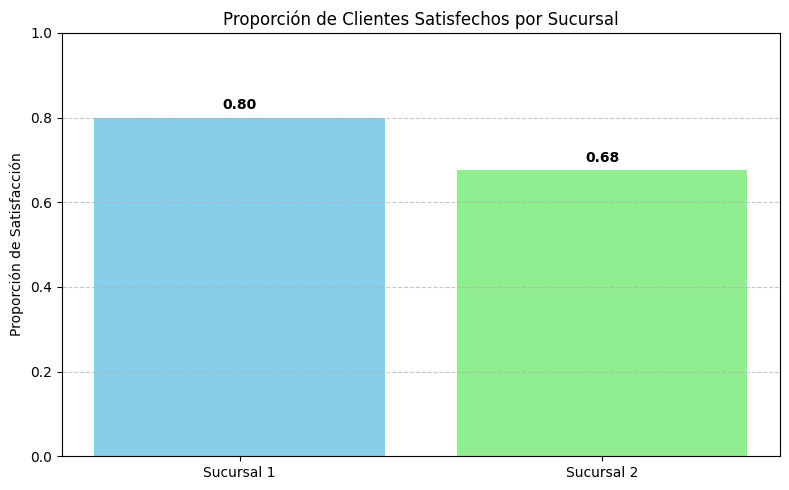

In [14]:
# Gráfico de barras de proporciones
plt.figure(figsize=(8, 5))
sucursales = ['Sucursal 1', 'Sucursal 2']
proporciones = [p1, p2]

plt.bar(sucursales, proporciones, color=['skyblue', 'lightgreen'])
plt.title('Proporción de Clientes Satisfechos por Sucursal')
plt.ylabel('Proporción de Satisfacción')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas
for i, prop in enumerate(proporciones):
    plt.text(i, prop + 0.02, f'{prop:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


Gráfica de barras que muestra visualmente que **Sucursal 1 tiene una proporción más alta de clientes satisfechos** en comparación con Sucursal 2.

---
## Pregunta Critica
### ¿Qué acciones recomendarías basándote en los resultados?

Recomendaría que la Sucursal 2 analice sus procesos de atención al cliente, capacitación del personal o calidad del servicio, ya que muestra una menor proporción de satisfacción. Podrían implementarse prácticas exitosas de la Sucursal 1 para mejorar la experiencia del cliente.

---

# Parte 3: Diferencia de Salarios por Genero
### Hipótesis:
- **H₀:** No hay diferencia significativa en los salarios entre hombres y mujeres.
- **H₁:** Existe una diferencia significativa en los salarios entre hombres y mujeres.

## Objetivo:
- Realizar prueba Z para comparación de medias.
- Calcular el valor p (α = 0.05).
- Generar un boxplot para visualizar la distribución.
- Contestar la pregunta crítica.

In [16]:
# Cargar datos de la hoja Diferencias_Grupos
df_salarios = excel_file.parse('Diferencias_Grupos')
df_salarios.head()

,Empleado,Género,Salario
0,Emp_1,Hombre,55815.818761
1,Emp_2,Hombre,50051.165305
2,Emp_3,Hombre,45092.456745
3,Emp_4,Hombre,52310.517371
4,Emp_5,Hombre,50995.298478


Los datos contienen los salarios de empleados clasificados por género *(Hombre y Mujer)*.

In [19]:
# Separar los salarios por género
hombres = df_salarios[df_salarios['Género'] == 'Hombre']['Salario']
mujeres = df_salarios[df_salarios['Género'] == 'Mujer']['Salario']

# Estadísticas necesarias
x1_bar = np.mean(hombres)
x2_bar = np.mean(mujeres)
s1 = np.std(hombres, ddof=1)
s2 = np.std(mujeres, ddof=1)
n1 = len(hombres)
n2 = len(mujeres)

# Desviación estándar combinada
pooled_std = math.sqrt((s1**2/n1) + (s2**2/n2))

# Prueba Z
z = (x1_bar - x2_bar) / pooled_std

# Valor p (bilateral)
p_value = 2 * (1 - norm.cdf(abs(z)))

print(f"Media hombres: {x1_bar:.2f}")
print(f"Media mujeres: {x2_bar:.2f}")
print(f"Valor z: {z:.4f}")
print(f"Valor p: {p_value:.6f}")
# x1_bar, x2_bar, z, p_value


Media hombres: 50896.38
Media mujeres: 47222.50
Valor z: 4.6677
Valor p: 0.000003


## Conclusión:
El valor p es muchísimo menor que 0.05, por lo tanto, **rechazamos la hipótesis nula (H₀).
Sí hay una diferencia significativa en los salarios entre hombres y mujeres.**

<Figure size 800x500 with 0 Axes>

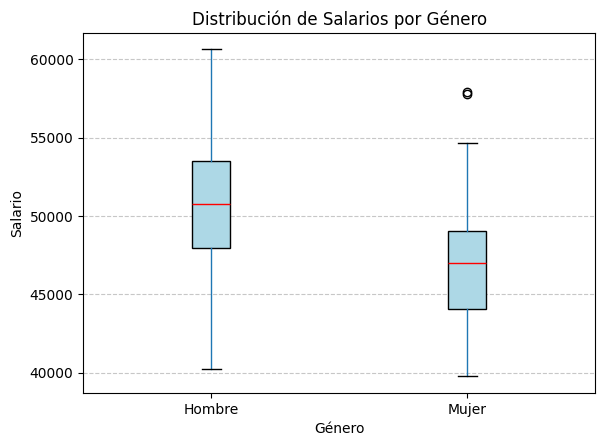

In [21]:
# Boxplot de salarios por género
plt.figure(figsize=(8, 5))
df_salarios.boxplot(column='Salario', by='Género', grid=False, patch_artist=True,
                    boxprops=dict(facecolor='lightblue'),
                    medianprops=dict(color='red'))

plt.title('Distribución de Salarios por Género')
plt.suptitle('')
plt.ylabel('Salario')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Boxplot** donde se puede ver que los hombres tienen una distribución salarial mayor que las mujeres, tanto en mediana como en dispersión.

---
## Pregunta crítica:
### ¿Qué implicaciones éticas y laborales tienen tus hallazgos?

Los resultados reflejan una brecha salarial significativa entre hombres y mujeres, lo cual plantea preocupaciones éticas sobre equidad laboral. Se recomienda realizar auditorías salariales y establecer políticas de igualdad de remuneración por trabajo de igual valor, para fomentar un entorno justo e inclusivo.

---


# Parte 4: Tiempos de Espera en Restaurantes
## Hipótesis:
- **H₀:** Los tiempos de espera son iguales en ambos restaurantes.
- **H₁:** Los tiempos de espera son diferentes entre los restaurantes.

## Objetivo:
- Prueba Z para comparación de medias.
- Calcular el valor p con α = 0.05.
- Crear un histograma superpuesto.
- Responder la pregunta crítica.

In [22]:
# Cargar datos de la hoja Distribuciones_ValoresP
df_espera = excel_file.parse('Distribuciones_ValoresP')
df_espera.head()

,Cliente,Restaurante,Tiempo de Espera (min)
0,Cl_1,Restaurante 1,5.628313
1,Cl_2,Restaurante 1,10.422735
2,Cl_3,Restaurante 1,9.722602
3,Cl_4,Restaurante 1,12.451181
4,Cl_5,Restaurante 1,13.025268


Los datos muestran el tiempo de espera en minutos de los clientes para dos restaurantes.

In [24]:
# Separar tiempos por restaurante
rest1 = df_espera[df_espera['Restaurante'] == 'Restaurante 1']['Tiempo de Espera (min)']
rest2 = df_espera[df_espera['Restaurante'] == 'Restaurante 2']['Tiempo de Espera (min)']

# Estadísticas necesarias
x1_bar = np.mean(rest1)
x2_bar = np.mean(rest2)
s1 = np.std(rest1, ddof=1)
s2 = np.std(rest2, ddof=1)
n1 = len(rest1)
n2 = len(rest2)

# Desviación estándar combinada
pooled_std = math.sqrt((s1**2/n1) + (s2**2/n2))

# Prueba Z
z = (x1_bar - x2_bar) / pooled_std

# Valor p (bilateral)
p_value = 2 * (1 - norm.cdf(abs(z)))

print(f"Media Restaurante 1: {x1_bar:.2f} min")
print(f"Media Restaurante 2: {x2_bar:.2f} min")
print(f"Valor z: {z:.4f}")
print(f"Valor p: {p_value:.6f}")

Media Restaurante 1: 11.88 min
Media Restaurante 2: 13.52 min
Valor z: -3.4581
Valor p: 0.000544


## Conclusión:
El valor p es mucho menor que α = 0.05, por lo tanto, **rechazamos la hipótesis nula (H₀).
Existe una diferencia significativa entre los tiempos de espera en ambos restaurantes.**

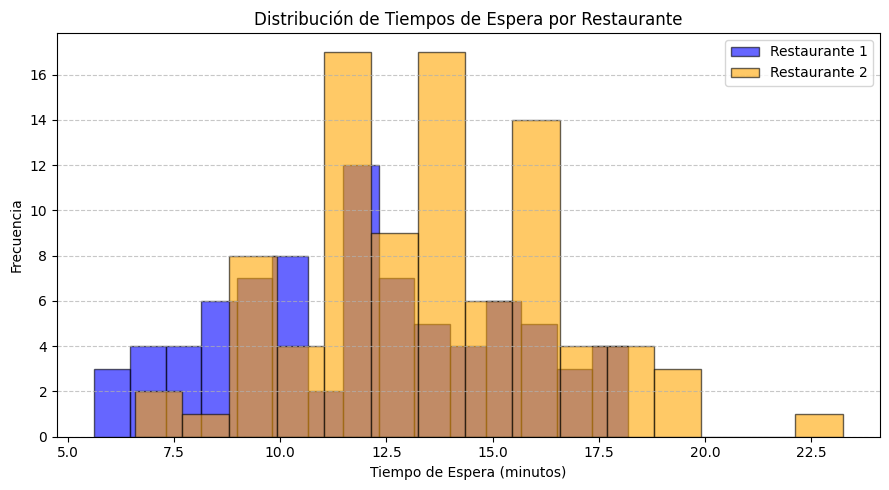

In [25]:
# Histograma superpuesto de tiempos de espera
plt.figure(figsize=(9, 5))
plt.hist(rest1, bins=15, alpha=0.6, label='Restaurante 1', color='blue', edgecolor='black')
plt.hist(rest2, bins=15, alpha=0.6, label='Restaurante 2', color='orange', edgecolor='black')

plt.title('Distribución de Tiempos de Espera por Restaurante')
plt.xlabel('Tiempo de Espera (minutos)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


histograma superpuesto. Se observa que el **Restaurante 2** tiene una tendencia a tiempos de espera más largos comparado con el **Restaurante 1.**

---
## Pregunta crítica:
### ¿Cómo podría mejorar la experiencia del cliente en el restaurante con mayor tiempo de espera?

 Restaurante 2 podría implementar estrategias como optimización del personal, sistema de reservas, o procesos de cocina más eficientes para reducir los tiempos de espera. Esto no solo mejoraría la experiencia del cliente, sino también su retención y satisfacción.

 ---

# Parte 5: Errores Tipo I y II

In [26]:
# Cargar los datos de la hoja Errores_Tipo_I_II
df_errores = excel_file.parse('Errores_Tipo_I_II')
df_errores.head()


,Paciente,Enfermo (Realidad),Resultado Prueba
0,Pac_1,0,0
1,Pac_2,1,1
2,Pac_3,0,0
3,Pac_4,1,1
4,Pac_5,0,0


In [30]:
# Conteo de los cuatro casos
VP = len(df_errores[(df_errores['Enfermo (Realidad)'] == 1) & (df_errores['Resultado Prueba'] == 1)])
FP = len(df_errores[(df_errores['Enfermo (Realidad)'] == 0) & (df_errores['Resultado Prueba'] == 1)])
FN = len(df_errores[(df_errores['Enfermo (Realidad)'] == 1) & (df_errores['Resultado Prueba'] == 0)])
VN = len(df_errores[(df_errores['Enfermo (Realidad)'] == 0) & (df_errores['Resultado Prueba'] == 0)])

# Crear matriz de confusión como DataFrame
matriz = pd.DataFrame({
    "Predicho: Enfermo": [VP, FP],
    "Predicho: Sano": [FN, VN]
}, index=["Real: Enfermo", "Real: Sano"])

# Calcular tasas de error
tasa_fp = FP / (FP + VN)
tasa_fn = FN / (FN + VP)

print(matriz)
print(f"Tasa de Falsos Positivos (FP): {tasa_fp:.4f}")
print(f"Tasa de Falsas Negativas (FN): {tasa_fn:.4f}")

               Predicho: Enfermo  Predicho: Sano
Real: Enfermo                 52               4
Real: Sano                    10              84
Tasa de Falsos Positivos (FP): 0.1064
Tasa de Falsas Negativas (FN): 0.0714


## Discusión:
### ¿Cómo afecta cambiar el umbral (α) a los errores tipo I y II?

Reducir el umbral (α más bajo) disminuye la probabilidad de cometer un **error tipo I **(falsos positivos), pero aumenta la probabilidad de cometer un **error tipo II **(falsos negativos), y viceversa. Esto implica que en pruebas médicas, donde es más peligroso no detectar una enfermedad, conviene aceptar más FP para minimizar los FN.

---
## Pregunta crítica:
### ¿Qué estrategia recomendarías para minimizar los errores en pruebas médicas?

Recomiendo ajustar el umbral de decisión para reducir falsos negativos (FN), especialmente en enfermedades graves. También es útil usar pruebas adicionales o confirmatorias, y aplicar modelos con mayor sensibilidad.
